# import all library

In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sklearn 

In [3]:
from nsepy import get_history
from datetime import date 
from datetime import datetime, timedelta

# Import company name

In [4]:
comp_name = pd.read_csv('comp_name.csv')
comp_name = comp_name["Symbol"]
comp_name

0        3MINDIA
1     ADANIGREEN
2     ADANIPORTS
3     ADANITRANS
4          ALKEM
         ...    
92           UPL
93          VEDL
94     WHIRLPOOL
95         WIPRO
96       YESBANK
Name: Symbol, Length: 97, dtype: object

# Try predict model on one company

In [5]:
data_tcs = get_history(symbol="TCS" ,  start=datetime.today() - timedelta(200), end=datetime.today())

In [6]:
data_tcs

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-12-28,TCS,EQ,3696.10,3710.00,3725.00,3693.85,3706.95,3706.55,3713.05,1456218,5.407013e+14,83968,917903,0.6303
2021-12-29,TCS,EQ,3706.55,3692.25,3719.95,3685.00,3688.05,3694.70,3704.90,1456923,5.397759e+14,94120,1091321,0.7491
2021-12-30,TCS,EQ,3694.70,3681.35,3740.00,3680.00,3737.00,3733.75,3725.52,1966475,7.326134e+14,105274,1296163,0.6591
2021-12-31,TCS,EQ,3733.75,3742.80,3760.00,3731.30,3740.00,3738.35,3744.51,1207141,4.520149e+14,101227,727618,0.6028
2022-01-03,TCS,EQ,3738.35,3750.00,3830.00,3745.00,3815.00,3817.75,3807.43,2346158,8.932828e+14,143798,1433211,0.6109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-11,TCS,EQ,3265.45,3206.15,3225.00,3106.00,3112.00,3113.80,3129.60,6974600,2.182770e+15,380075,3636712,0.5214
2022-07-12,TCS,EQ,3113.80,3114.90,3136.20,3080.25,3084.50,3084.70,3107.29,3734815,1.160515e+15,205086,2079781,0.5569
2022-07-13,TCS,EQ,3084.70,3104.00,3110.00,3035.00,3040.50,3038.75,3062.02,3863530,1.183019e+15,235688,2508061,0.6492


In [7]:
# define function to find useful data column only
def change_po_ne(x):
    if x>=0:
        return 1
    else :
        return 0

In [8]:
def useful_data(name,a):
    data = get_history(symbol= name ,  start=datetime.today() - timedelta(a), end=datetime.today())
    data1 =data.drop([ "Symbol","Series","Turnover","Trades","Deliverable Volume" ], axis = 1)
    data1["%change"] = ((data1["Close"]-data["Open"])/data["Open"])*100
    data1["change"] = data1["%change"].apply(change_po_ne)
    data1 = data1.drop(["%change"], axis  =1)
    
    return data1

In [9]:
data_trial = useful_data('TCS',1000)
data_trial

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,%Deliverble,change
Date,,,,,,,,,,
2019-10-22,2057.35,2080.00,2111.50,2040.05,2050.00,2051.40,2067.79,5552505,0.6454,0
2019-10-23,2051.40,2060.00,2083.85,2052.50,2082.00,2070.10,2068.82,2348134,0.5761,1
2019-10-24,2070.10,2084.00,2099.00,2061.30,2079.75,2082.00,2077.28,2798671,0.6270,0
2019-10-25,2082.00,2094.00,2130.00,2075.05,2121.60,2124.95,2102.55,3954245,0.6412,1
2019-10-27,2124.95,2129.00,2129.00,2108.80,2117.65,2115.70,2117.14,224421,0.3417,0
...,...,...,...,...,...,...,...,...,...,...
2022-07-11,3265.45,3206.15,3225.00,3106.00,3112.00,3113.80,3129.60,6974600,0.5214,0
2022-07-12,3113.80,3114.90,3136.20,3080.25,3084.50,3084.70,3107.29,3734815,0.5569,0
2022-07-13,3084.70,3104.00,3110.00,3035.00,3040.50,3038.75,3062.02,3863530,0.6492,0


In [10]:
y = data_trial["change"]
y

Date
2019-10-22    0
2019-10-23    1
2019-10-24    0
2019-10-25    1
2019-10-27    0
             ..
2022-07-11    0
2022-07-12    0
2022-07-13    0
2022-07-14    0
2022-07-15    0
Name: change, Length: 683, dtype: int64

In [11]:
y = y.iloc[1:]
y

Date
2019-10-23    1
2019-10-24    0
2019-10-25    1
2019-10-27    0
2019-10-29    1
             ..
2022-07-11    0
2022-07-12    0
2022-07-13    0
2022-07-14    0
2022-07-15    0
Name: change, Length: 682, dtype: int64

In [12]:
x = data_trial.drop(["change"] , axis =1)
x = x.iloc[:-1]
x

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,%Deliverble
Date,,,,,,,,,
2019-10-22,2057.35,2080.00,2111.50,2040.05,2050.00,2051.40,2067.79,5552505,0.6454
2019-10-23,2051.40,2060.00,2083.85,2052.50,2082.00,2070.10,2068.82,2348134,0.5761
2019-10-24,2070.10,2084.00,2099.00,2061.30,2079.75,2082.00,2077.28,2798671,0.6270
2019-10-25,2082.00,2094.00,2130.00,2075.05,2121.60,2124.95,2102.55,3954245,0.6412
2019-10-27,2124.95,2129.00,2129.00,2108.80,2117.65,2115.70,2117.14,224421,0.3417
...,...,...,...,...,...,...,...,...,...
2022-07-08,3287.85,3300.00,3305.00,3250.00,3266.00,3265.45,3276.37,2136916,0.5474
2022-07-11,3265.45,3206.15,3225.00,3106.00,3112.00,3113.80,3129.60,6974600,0.5214
2022-07-12,3113.80,3114.90,3136.20,3080.25,3084.50,3084.70,3107.29,3734815,0.5569


In [13]:
from sklearn.model_selection import train_test_split
x_train , x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 10)

In [14]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(fit_intercept=True,max_iter=10000)
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.5073170731707317

In [15]:
y_test_pre = lr_clf.predict(x_test)
y_test_pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [16]:
y_test

Date
2020-01-14    1
2020-06-19    1
2021-12-23    1
2020-10-05    1
2020-08-06    1
             ..
2020-06-25    0
2021-02-10    1
2020-06-03    0
2022-04-22    1
2020-09-23    0
Name: change, Length: 205, dtype: int64

In [17]:
from sklearn.metrics import confusion_matrix ,plot_confusion_matrix
import seaborn as sn

In [18]:
c= confusion_matrix(y_test_pre, y_test)
c

array([[97, 92],
       [ 9,  7]], dtype=int64)

C:\Users\SANDEEP KUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


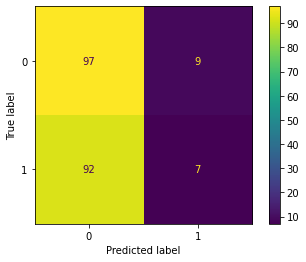

In [19]:
plot_confusion_matrix(lr_clf,x_test , y_test)

In [20]:
data_final = pd.DataFrame(columns=['name', 'predict','%accurate'])

# NOw time to apply for all company

In [21]:
for name in comp_name:
    print(name)
    data_f = useful_data(name,200)
    y_f = data_f["change"]
    y_f= y_f.iloc[1:]
    x_f = data_f.drop(["change"] , axis =1)
    x_f= x_f.iloc[:-1]
    x_train_f , x_test_f,y_train_f,y_test_f = train_test_split(x_f,y_f,test_size = 0.3,random_state = 10)
    lr_clf_f = LogisticRegression(fit_intercept=True,max_iter=10000)
    lr_clf_f.fit(x_train_f,y_train_f)
    score = lr_clf_f.score(x_test_f,y_test_f)
    
    
    data_yes = useful_data(name , 0)
    data_yes_x = data_f.drop(["change"] , axis =1)
    pre = lr_clf.predict(data_yes_x)[0]
#     print(pre)
    df2 = {'name': name, 'predict': pre, '%accurate': score*100}
    data_final = data_final.append(df2, ignore_index = True)
    
  
   
    

    
    

3MINDIA
ADANIGREEN
ADANIPORTS
ADANITRANS
ALKEM
AMBUJACEM
ASIANPAINT
AUROPHARMA
AXISBANK
BAJAJ-AUTO
BAJAJFINSV
BAJFINANCE
BANDHANBNK
BANKBARODA
BERGEPAINT
BHARTIARTL
BIOCON
BOSCHLTD
BPCL
BRITANNIA
CIPLA
COALINDIA
COLPAL
DABUR
DIVISLAB
DLF
DMART
DRREDDY
EICHERMOT
GAIL
GLAXO
GODREJCP
GRASIM
HAVELLS
HCLTECH
HDFC
HDFCAMC
HDFCBANK
HDFCLIFE
HEROMOTOCO
HINDALCO
HINDPETRO
HINDUNILVR
HINDZINC
HONAUT
ICICIBANK
ICICIGI
ICICIPRULI
IGL
INDIGO
INDUSINDBK
INFY
IOC
ITC
JSWSTEEL
KANSAINER
KOTAKBANK
LT
LTI
LUPIN
M&M
MARICO
MARUTI
MCDOWELL-N
MRF
MUTHOOTFIN
NAUKRI
NMDC
NTPC
ONGC
PEL
PETRONET
PFC
PGHH
PIDILITIND
PNB
POWERGRID
RELIANCE
SBICARD
SBILIFE
SBIN
SHREECEM
SIEMENS
SUNPHARMA
TATAMOTORS
TATASTEEL
TCS
TECHM
TITAN
TORNTPHARM
UBL
ULTRACEMCO
UPL
VEDL
WHIRLPOOL
WIPRO
YESBANK


In [22]:
data_final[data_final["name"]=='CIPLA']

,name,predict,%accurate
20,CIPLA,0,47.619048


In [23]:
from datetime import date
today = date.today()

# dd/mm/YY
d1 = today.strftime("%d_%m_%Y.csv")
d1

'16_07_2022.csv'

In [24]:
data_final.to_csv(d1,index = False)